In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


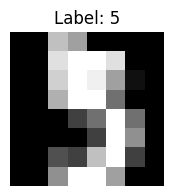

In [18]:
from sklearn.datasets import load_digits
digits=load_digits()
def plot_digit(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f"Label: {digits.target[index]}")
    plt.axis('off')
    plt.show()
plot_digit(5)

In [19]:
from sklearn.model_selection import train_test_split
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [21]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_pred))

Test Accuracy: 0.975


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [24]:
print("Number of components that explain 95% variance:", pca.n_components_)

Number of components that explain 95% variance: 40


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [27]:
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, Y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(Y_test, y_pred_pca)

In [30]:
print("Accuracy with PCA (95% variance):", accuracy_pca)

Accuracy with PCA (95% variance): 0.9611111111111111


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])